Clustering the US Demographics most impacted by Covid-19


Steps performed in this project:

Exploratory Data Analysis

Feature Engineering

Handle Missing Values

One Hot Encoding

Scaling and Normalization

PCA Transformation

Model Building and Evaluation

Elbow Method

Silhouette Coefficient

K-Means Clustering Model

Result

In [1]:
# Importing the basic libraries
import pandas as pd               # linear algebra
import seaborn as sns             # data visualization
import numpy as np                # data processing
import matplotlib.pyplot as plt   # data visualization
%matplotlib inline

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# Ignore and hide warnings
import warnings
warnings.filterwarnings("ignore")

# Change figure size of all the matplotlib visualizations 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

In [2]:
# Load the data 
data_modified = pd.read_csv("data_modified.csv")
data_modified.head()

,Record_ID,Record_Year,Record_Month,Record_State,Sex,Age_Group,Covid_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_Covid_Deaths,Influenza_Deaths,Pneumonia_Influenza_Covid_Deaths
0,9096,2020.0,1.0,Alabama,Male,Under 1 year,0.0,17.0,0.0,0.0,0.0,0.0
1,9097,2020.0,1.0,Alabama,Male,0-17 years,0.0,44.0,0.0,0.0,NaN,NaN
2,9098,2020.0,1.0,Alabama,Male,1-4 years,0.0,NaN,0.0,0.0,0.0,0.0
3,9099,2020.0,1.0,Alabama,Male,5-14 years,0.0,11.0,0.0,0.0,0.0,0.0
4,9100,2020.0,1.0,Alabama,Male,15-24 years,0.0,43.0,0.0,0.0,NaN,NaN


In [3]:
data_modified.shape

(27136, 12)

In [4]:
#Handle Missing Value 
data_modified.isnull().sum()

Record_ID                              0
Record_Year                            0
Record_Month                           0
Record_State                           0
Sex                                    0
Age_Group                              0
Covid_Deaths                        7027
Total_Deaths                        5597
Pneumonia_Deaths                    9203
Pneumonia_Covid_Deaths              6618
Influenza_Deaths                    3558
Pneumonia_Influenza_Covid_Deaths    9198
dtype: int64

In [5]:
data_modified.fillna(0, inplace=True)

In [6]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27136 entries, 0 to 27135
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Record_ID                         27136 non-null  int64  
 1   Record_Year                       27136 non-null  float64
 2   Record_Month                      27136 non-null  float64
 3   Record_State                      27136 non-null  object 
 4   Sex                               27136 non-null  object 
 5   Age_Group                         27136 non-null  object 
 6   Covid_Deaths                      27136 non-null  float64
 7   Total_Deaths                      27136 non-null  float64
 8   Pneumonia_Deaths                  27136 non-null  float64
 9   Pneumonia_Covid_Deaths            27136 non-null  float64
 10  Influenza_Deaths                  27136 non-null  float64
 11  Pneumonia_Influenza_Covid_Deaths  27136 non-null  float64
dtypes: f

One Hot Encoding

In [7]:
sex=pd.get_dummies(data_modified['Sex'])
age=pd.get_dummies(data_modified['Age_Group'])

data_modified=data_modified.drop(['Sex', 'Age_Group'], axis=1)
data_modified=pd.concat([data_modified, sex, age], axis=1)

data_modified.head()

,Record_ID,Record_Year,Record_Month,Record_State,Covid_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_Covid_Deaths,Influenza_Deaths,Pneumonia_Influenza_Covid_Deaths,Female,Male,0-17 years,1-4 years,15-24 years,18-29 years,25-34 years,30-39 years,35-44 years,40-49 years,45-54 years,5-14 years,50-64 years,55-64 years,65-74 years,75-84 years,85 years and over,Under 1 year
0,9096,2020.0,1.0,Alabama,0.0,17.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,9097,2020.0,1.0,Alabama,0.0,44.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9098,2020.0,1.0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9099,2020.0,1.0,Alabama,0.0,11.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,9100,2020.0,1.0,Alabama,0.0,43.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
state=pd.get_dummies(data_modified['Record_State'])

data_modified=data_modified.drop(['Record_State'], axis=1)
data_modified=pd.concat([data_modified, state], axis=1)

In [9]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27136 entries, 0 to 27135
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Record_ID                         27136 non-null  int64  
 1   Record_Year                       27136 non-null  float64
 2   Record_Month                      27136 non-null  float64
 3   Covid_Deaths                      27136 non-null  float64
 4   Total_Deaths                      27136 non-null  float64
 5   Pneumonia_Deaths                  27136 non-null  float64
 6   Pneumonia_Covid_Deaths            27136 non-null  float64
 7   Influenza_Deaths                  27136 non-null  float64
 8   Pneumonia_Influenza_Covid_Deaths  27136 non-null  float64
 9   Female                            27136 non-null  uint8  
 10  Male                              27136 non-null  uint8  
 11  0-17 years                        27136 non-null  uint8  
 12  1-4 

In [10]:
# As we are only focusing on Covid Deaths, so droping other death rates
drop_list_new = ['Total_Deaths', 'Pneumonia_Deaths', 'Pneumonia_Covid_Deaths', 'Influenza_Deaths', 'Pneumonia_Influenza_Covid_Deaths']
data_modified = data_modified.drop(drop_list_new, axis=1)
data_modified.head()

,Record_ID,Record_Year,Record_Month,Covid_Deaths,Female,Male,0-17 years,1-4 years,15-24 years,18-29 years,25-34 years,30-39 years,35-44 years,40-49 years,45-54 years,5-14 years,50-64 years,55-64 years,65-74 years,75-84 years,85 years and over,Under 1 year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,New York City,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,9096,2020.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9097,2020.0,1.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9098,2020.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9099,2020.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9100,2020.0,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Copy the cleaned and handled data to new dataset
cleaned_dataset=data_modified
cleaned_dataset.head()

,Record_ID,Record_Year,Record_Month,Covid_Deaths,Female,Male,0-17 years,1-4 years,15-24 years,18-29 years,25-34 years,30-39 years,35-44 years,40-49 years,45-54 years,5-14 years,50-64 years,55-64 years,65-74 years,75-84 years,85 years and over,Under 1 year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,New York City,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,9096,2020.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9097,2020.0,1.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9098,2020.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9099,2020.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9100,2020.0,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Standardize data
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler() 
scaled_df = scaler.fit_transform(cleaned_dataset) 
  
scaled_df

array([[-1.73129056, -0.57735027, -1.28571429, ..., -0.13867505,
        -0.13867505, -0.13867505],
       [-1.73121046, -0.57735027, -1.28571429, ..., -0.13867505,
        -0.13867505, -0.13867505],
       [-1.73113036, -0.57735027, -1.28571429, ..., -0.13867505,
        -0.13867505, -0.13867505],
       ...,
       [ 1.73113036,  1.73205081, -0.42857143, ..., -0.13867505,
        -0.13867505, -0.13867505],
       [ 1.73121046,  1.73205081, -0.42857143, ..., -0.13867505,
        -0.13867505, -0.13867505],
       [ 1.73129056,  1.73205081, -0.42857143, ..., -0.13867505,
        -0.13867505, -0.13867505]])

In [13]:
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,-0.198543,-0.066210,-0.147445,-0.026678,-0.114679,0.114679,-0.029610,-0.029610,-0.029610,-0.02961,-0.02961,-0.02961,-0.02961,-0.02961,-0.02961,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,0.444151,0.826964,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903
1,-0.198534,-0.066210,-0.147445,-0.026678,-0.114680,0.114680,0.444152,-0.029610,-0.029610,-0.02961,-0.02961,-0.02961,-0.02961,-0.02961,-0.02961,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,0.826966,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903
2,-0.198526,-0.066210,-0.147445,-0.026678,-0.114680,0.114680,-0.029610,0.444153,-0.029610,-0.02961,-0.02961,-0.02961,-0.02961,-0.02961,-0.02961,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,0.826967,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903
3,-0.198517,-0.066210,-0.147446,-0.026678,-0.114680,0.114680,-0.029610,-0.029610,-0.029610,-0.02961,-0.02961,-0.02961,-0.02961,-0.02961,-0.02961,0.444153,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,0.826969,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903
4,-0.198508,-0.066211,-0.147446,-0.026678,-0.114680,0.114680,-0.029610,-0.029610,0.444154,-0.02961,-0.02961,-0.02961,-0.02961,-0.02961,-0.02961,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,-0.029610,0.826970,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903,-0.015903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Principal Component Analysis

In [14]:
# Principal component analysis (PCA) is a technique to bring out strong patterns in a dataset by supressing variations.
# It is used to clean data sets to make it easy to explore and analyse. 

from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 

X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,0.246592,-0.201330
1,0.246834,-0.197981
2,0.246818,-0.200738
3,0.246321,-0.203671
4,0.245383,-0.201274


Model Building and Evaluation
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.


Elbow Method


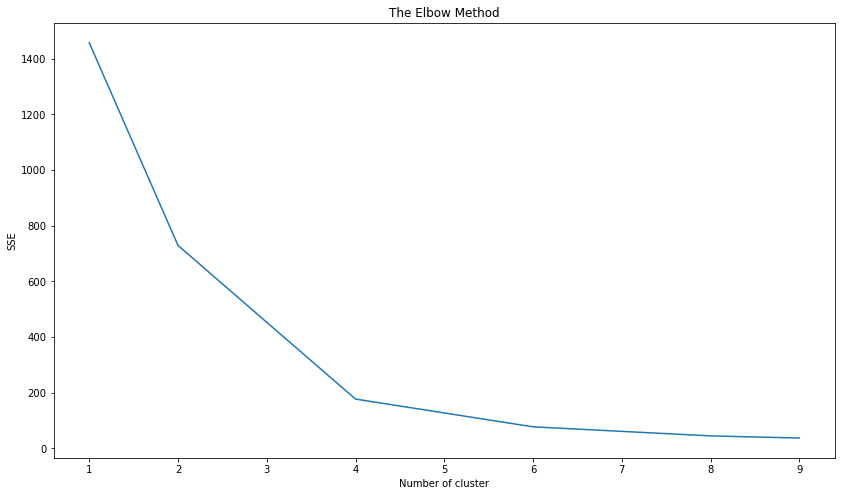

In [15]:
# Elbow method is used to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10).
# For each value of k, we calculate sum of squared errors (SSE) and 
# the point where the SSE starts to flatten out is the required k value.

from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Silhouette Coefficient


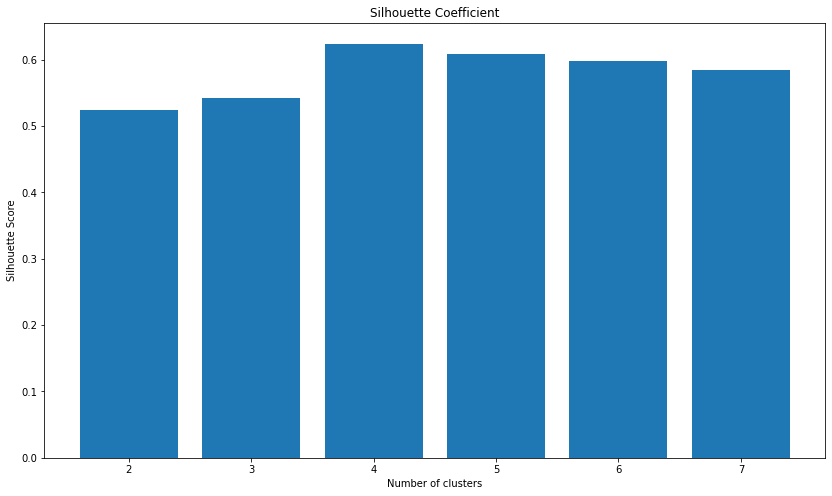

In [16]:
# K-Means clustering can then be evaluated using Silhouette Coefficient.
# A higher Silhouette Coefficient score relates to a model with better-defined clusters.

from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.title('Silhouette Coefficient')
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

From the Elbow method and Silhouette Coefficient, it is clear that k=4 is the best value in this case.

K-Means Clustering Model

In [17]:
# Using k=4 to make the KMeans model

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_principal)

KMeans(n_clusters=4)

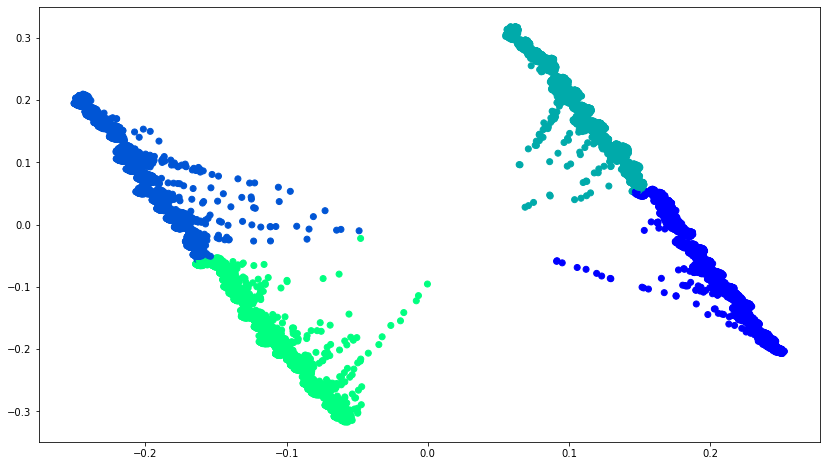

In [18]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 4).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

In [19]:
labels=kmeans.labels_
clusters=pd.concat([cleaned_dataset, pd.DataFrame({'cluster':labels})], axis=1)

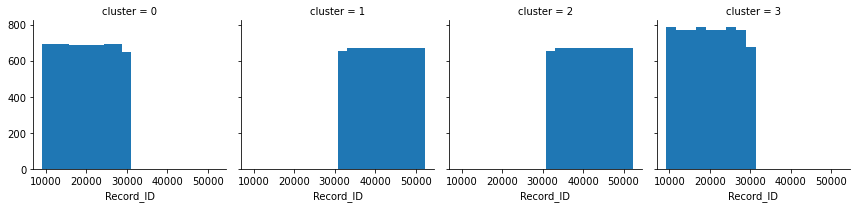

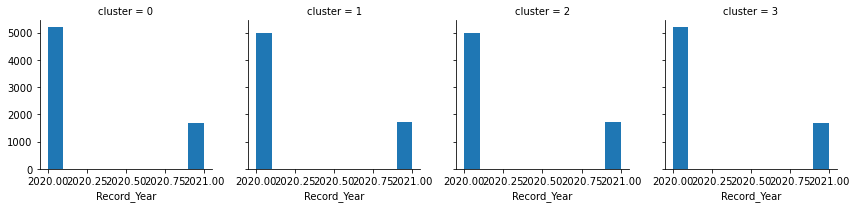

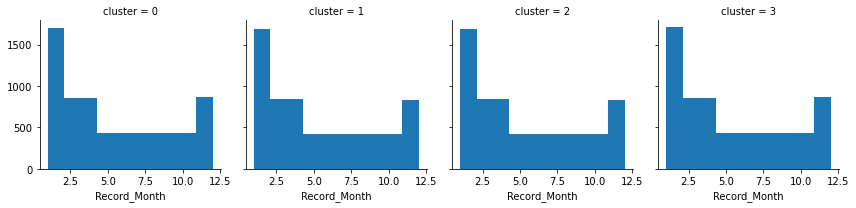

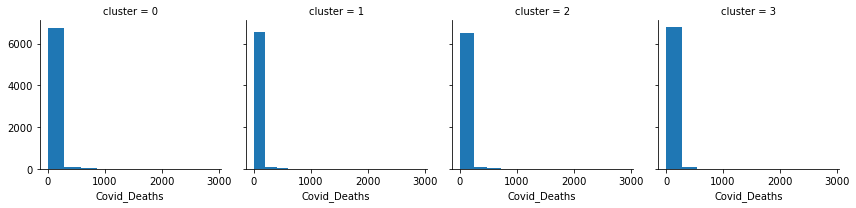

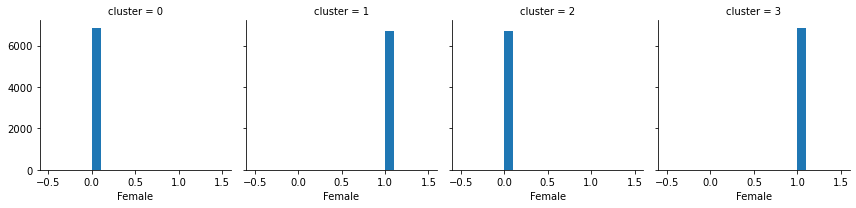

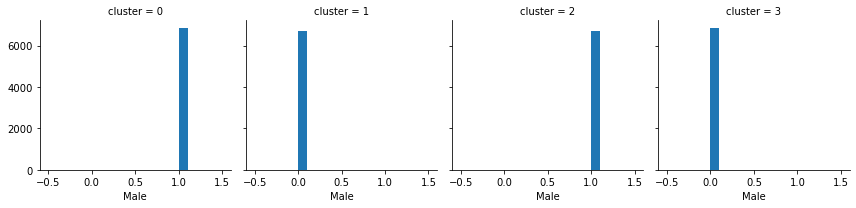

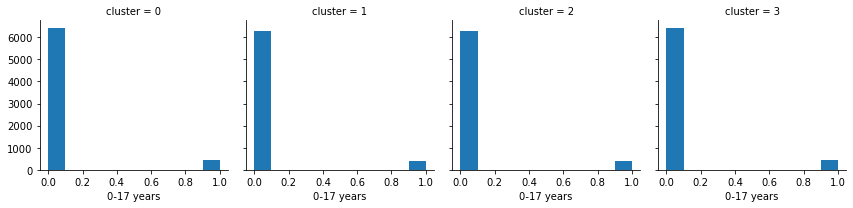

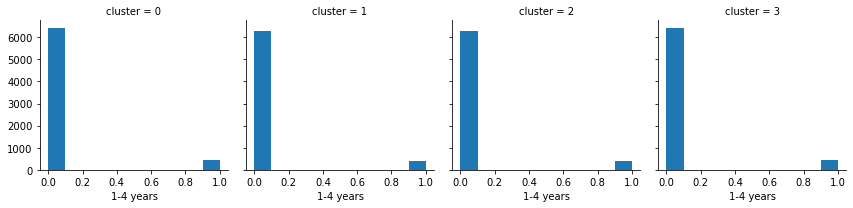

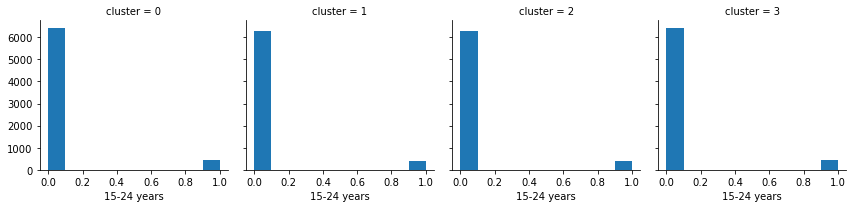

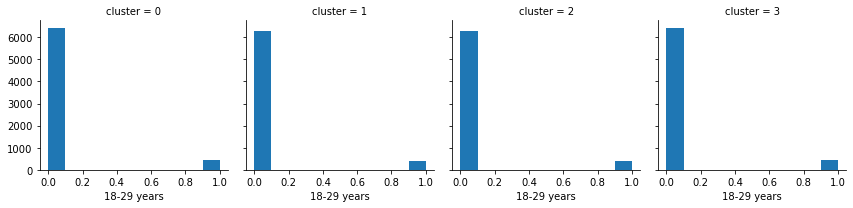

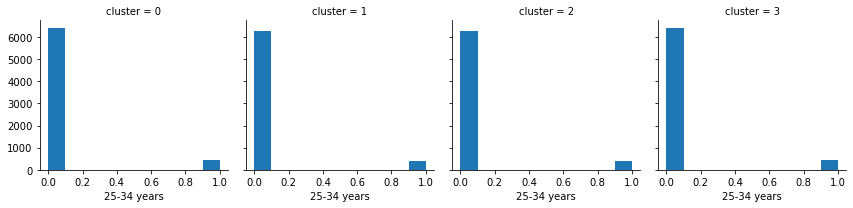

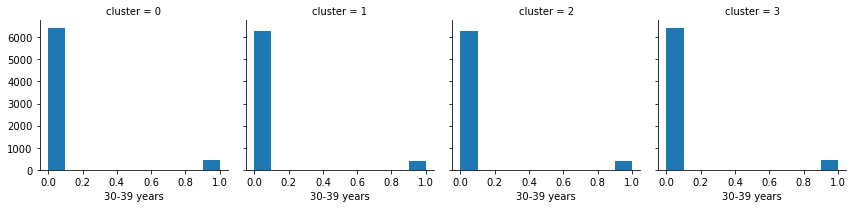

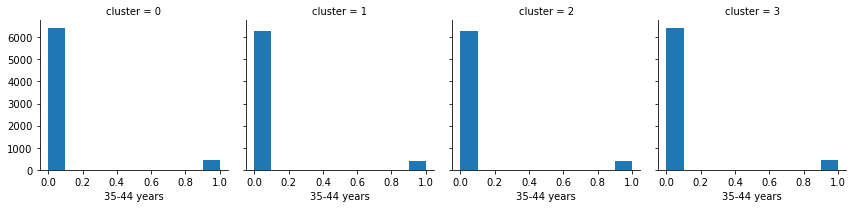

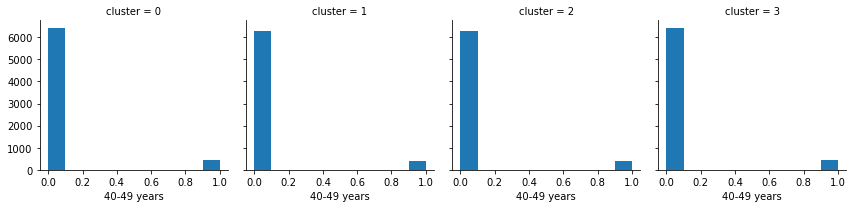

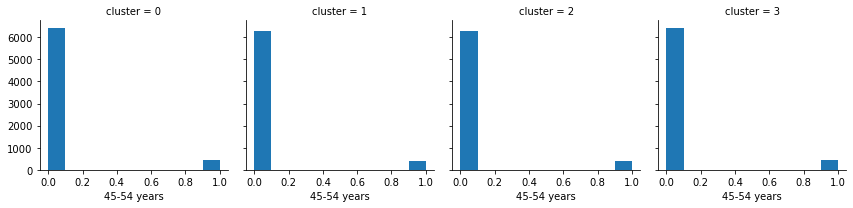

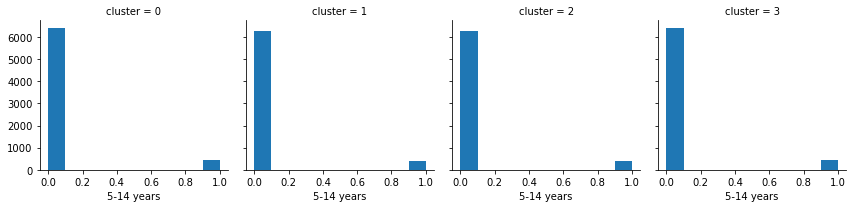

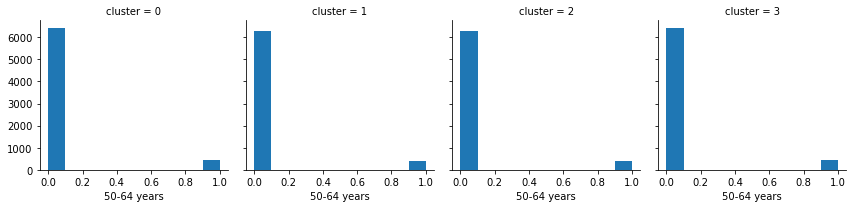

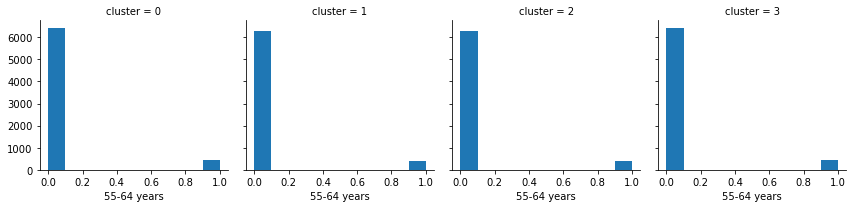

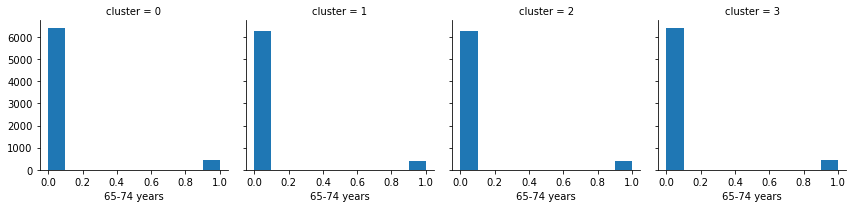

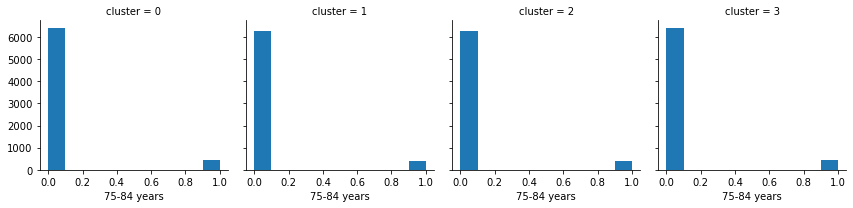

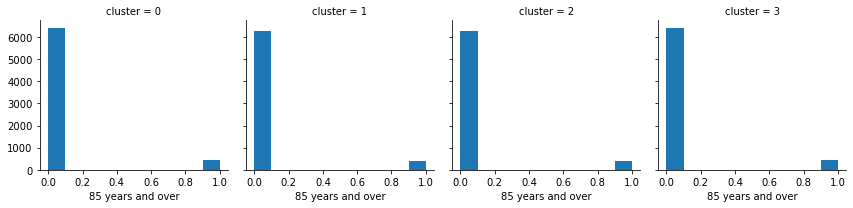

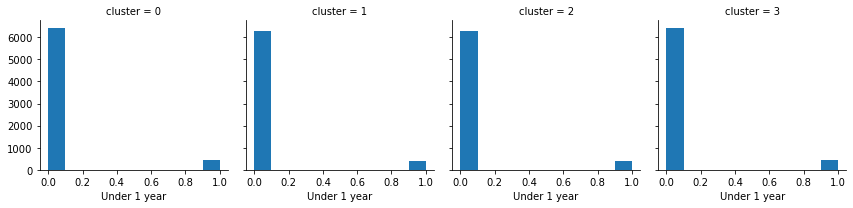

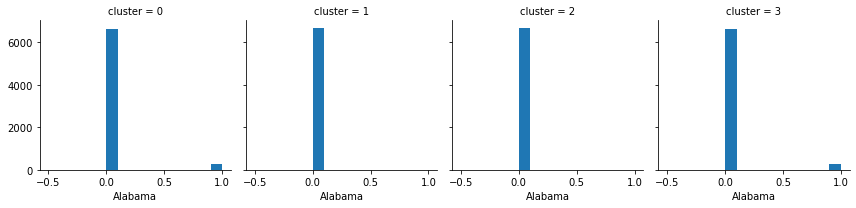

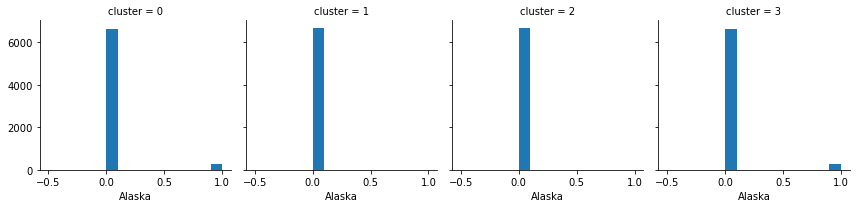

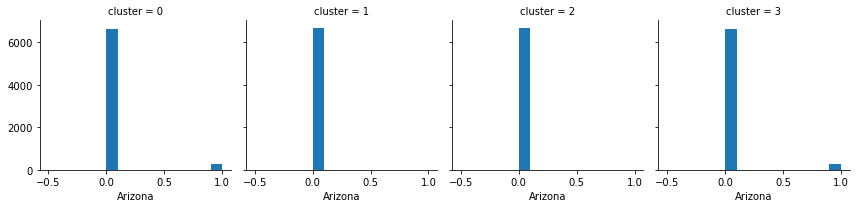

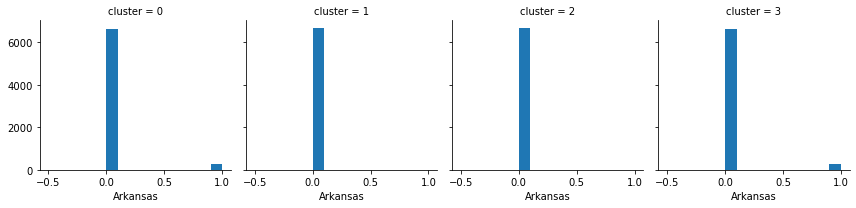

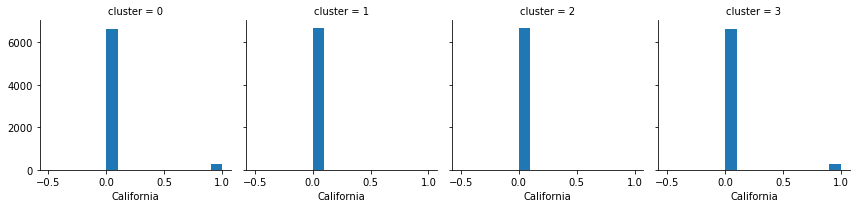

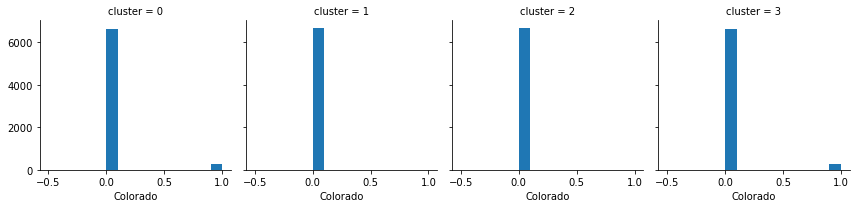

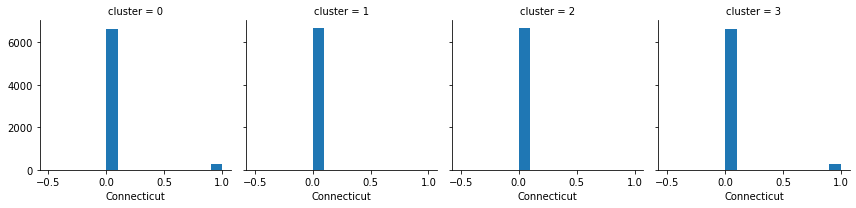

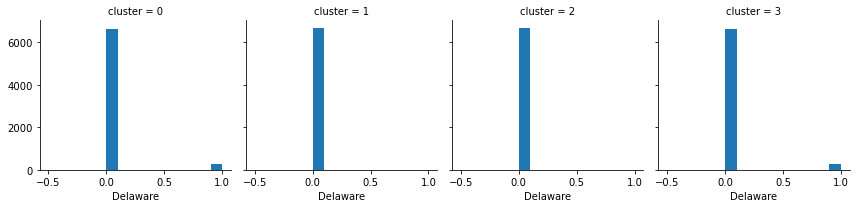

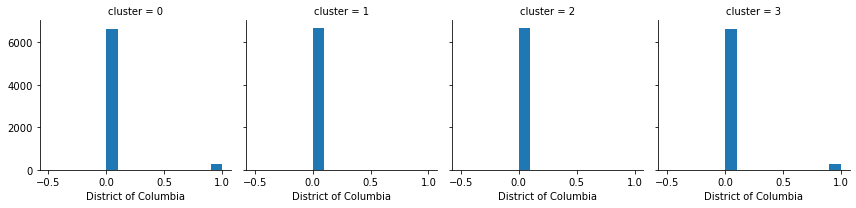

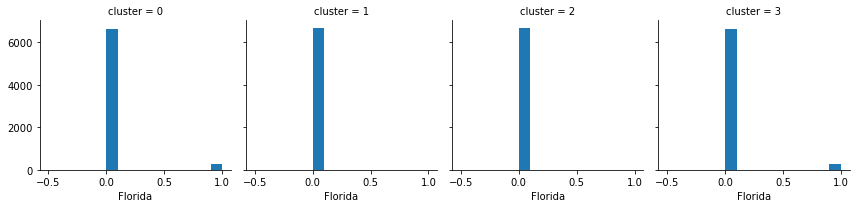

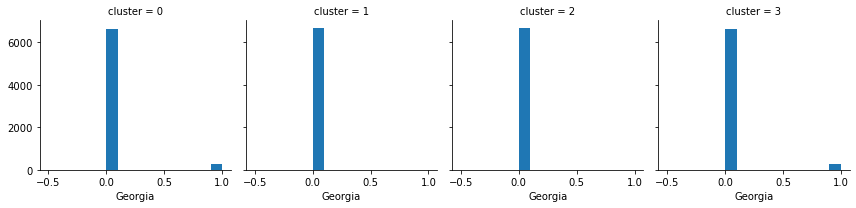

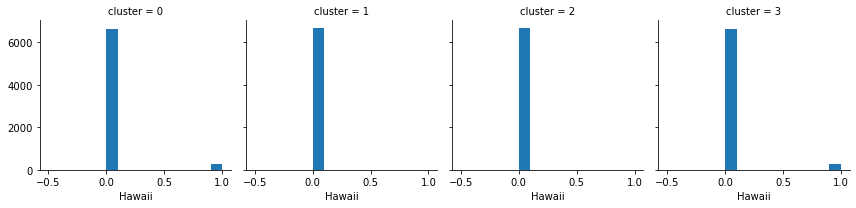

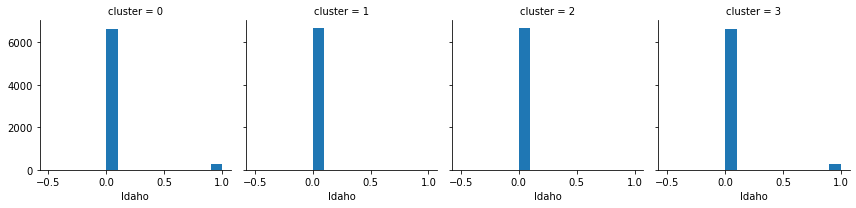

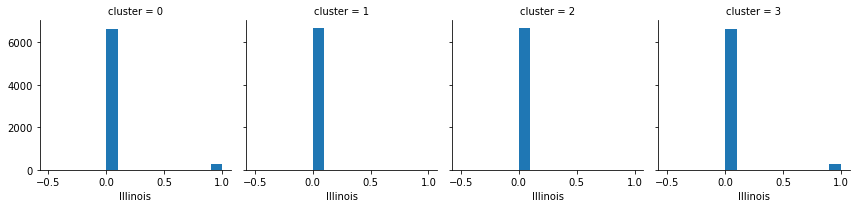

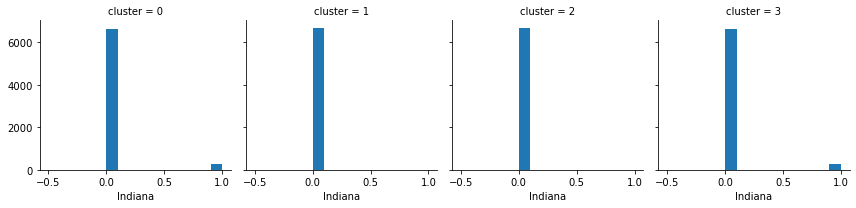

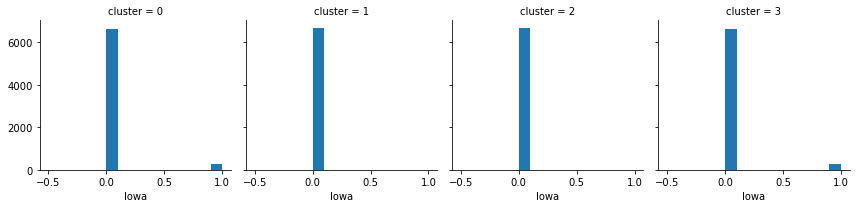

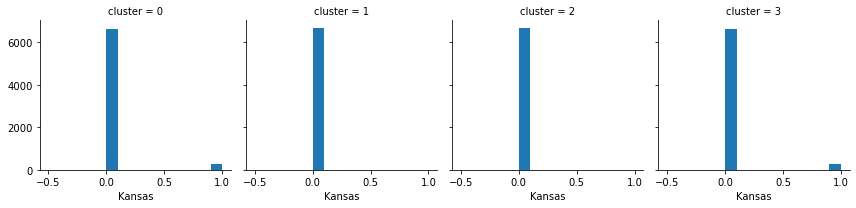

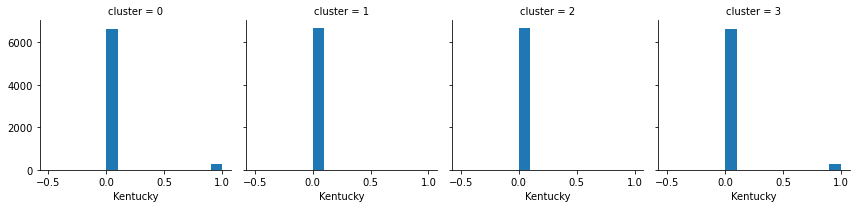

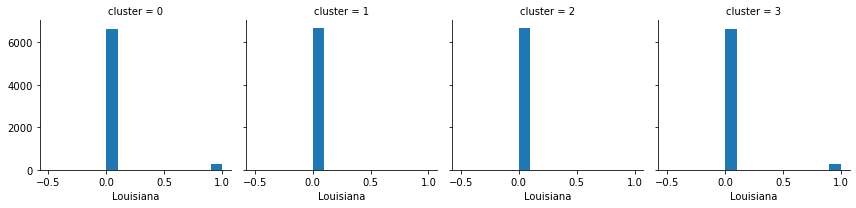

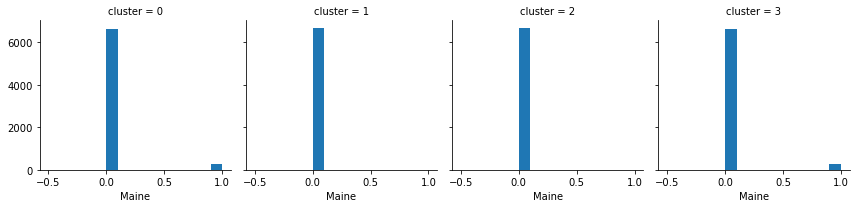

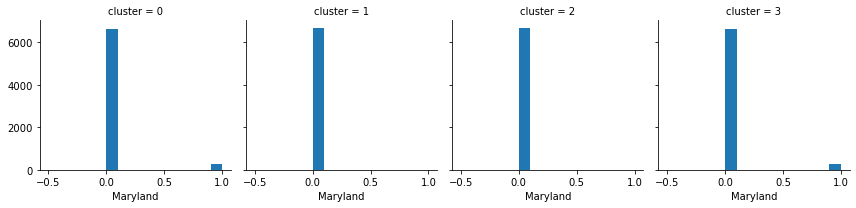

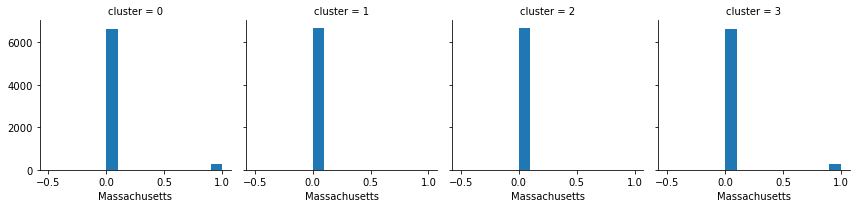

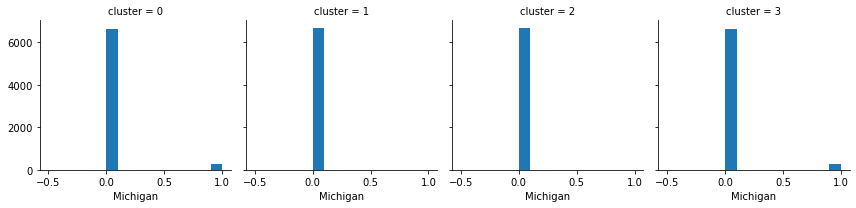

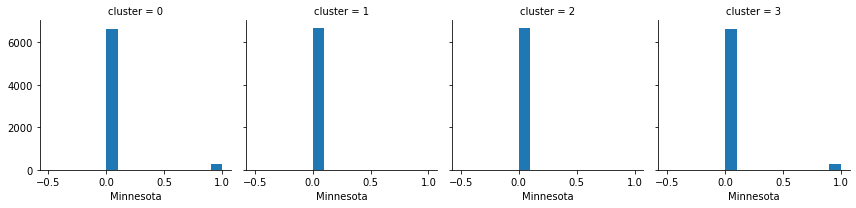

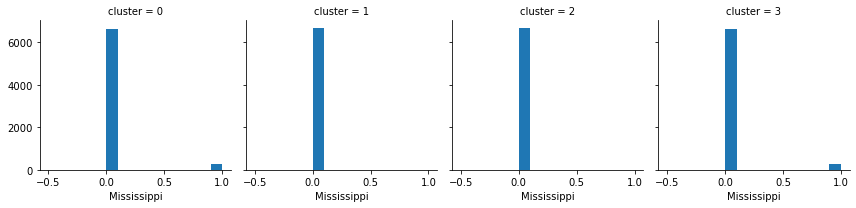

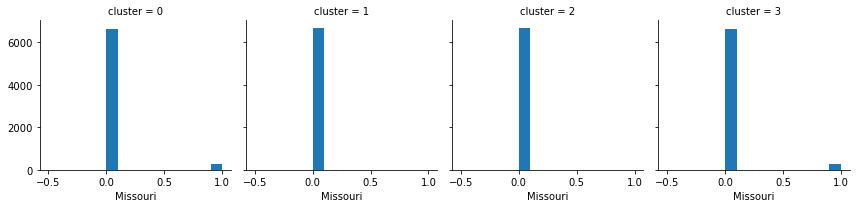

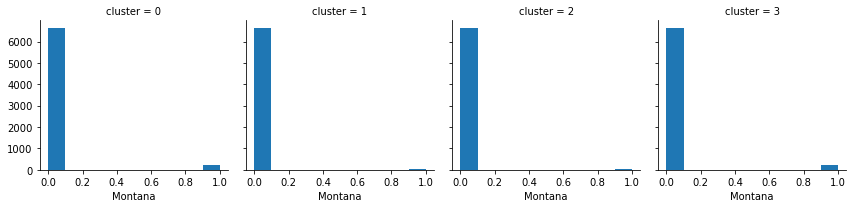

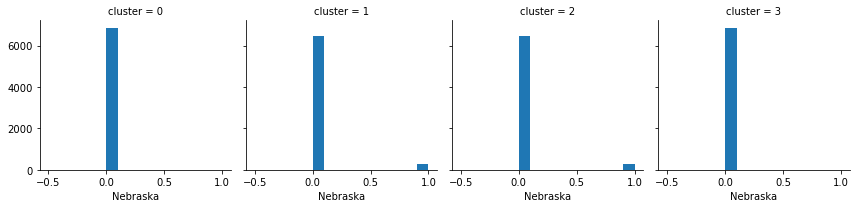

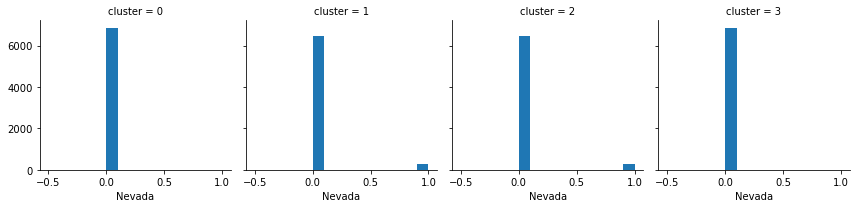

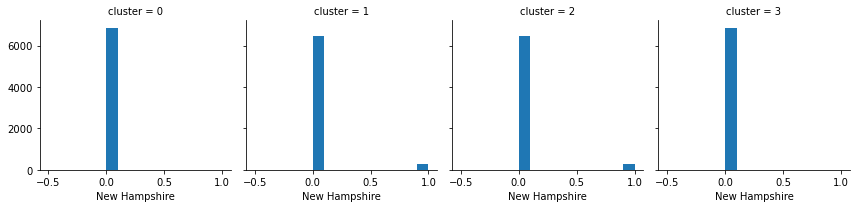

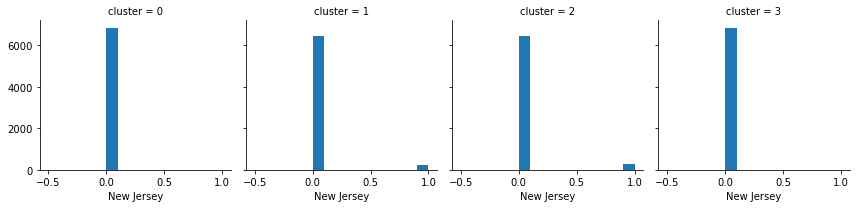

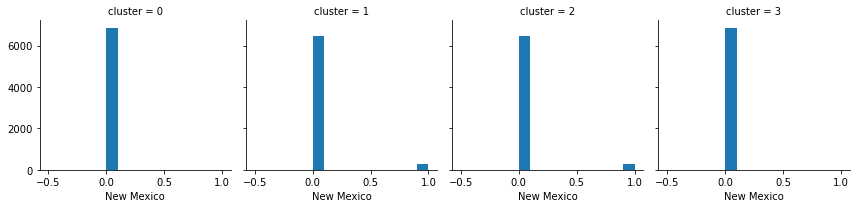

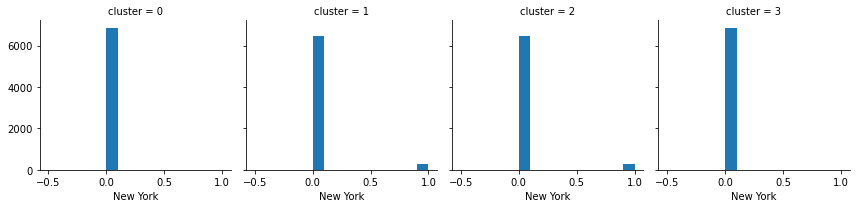

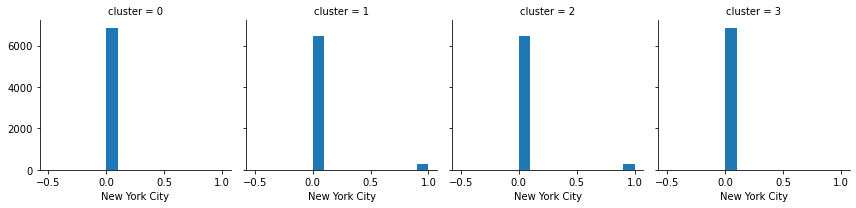

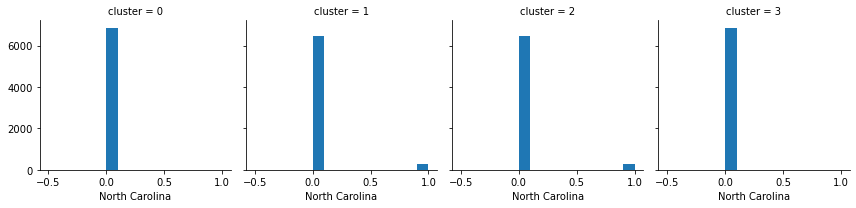

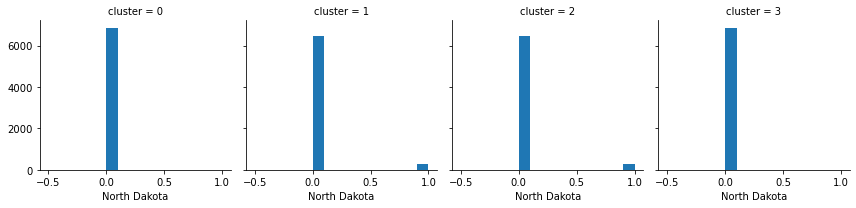

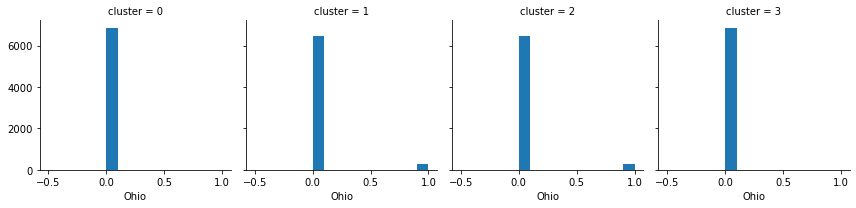

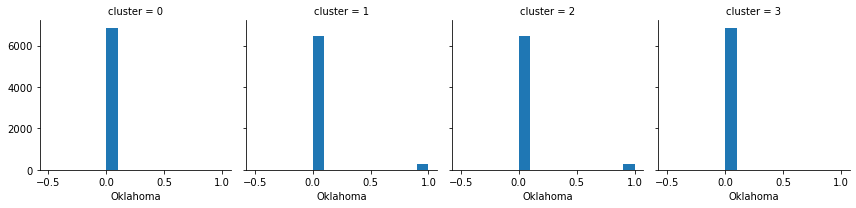

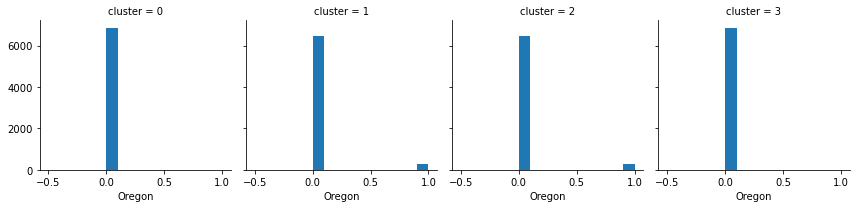

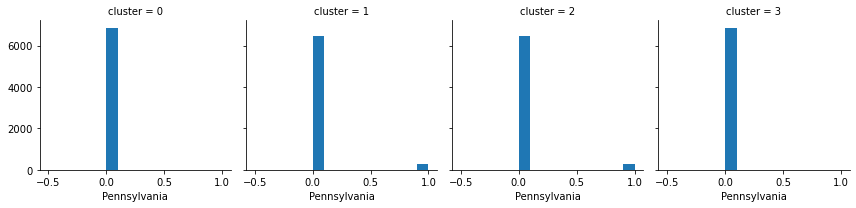

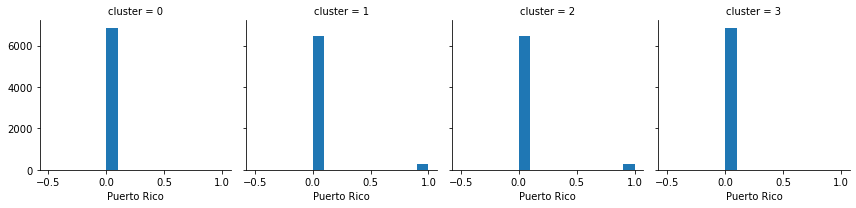

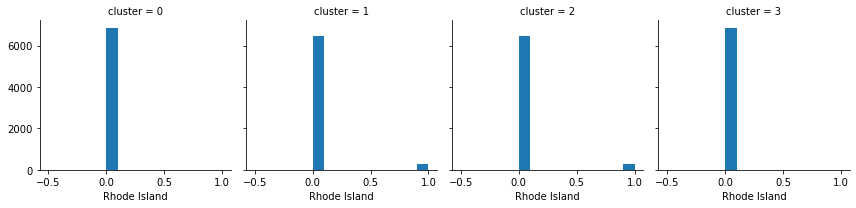

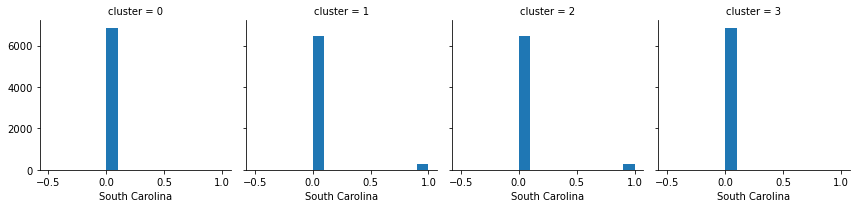

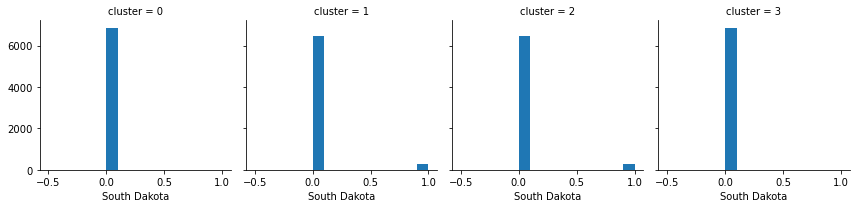

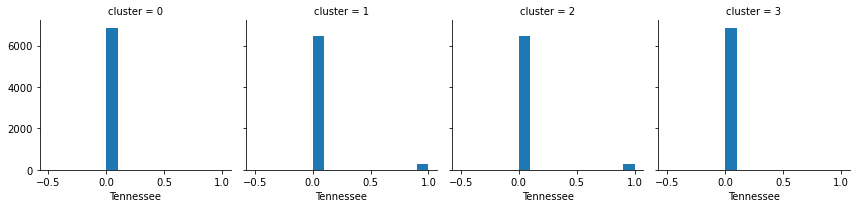

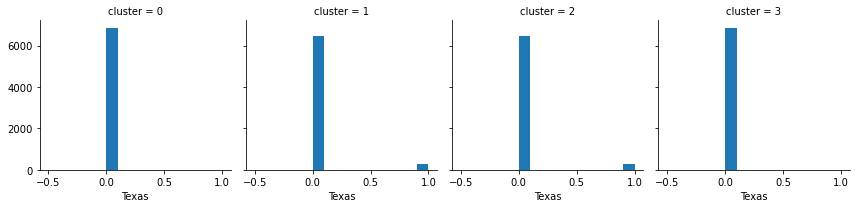

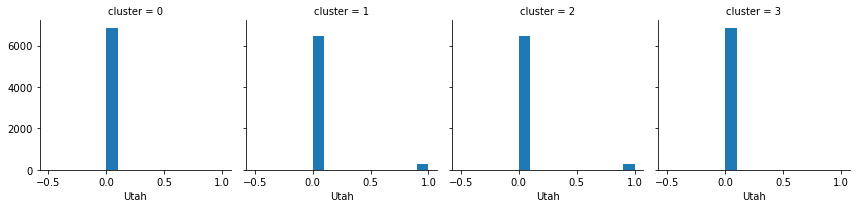

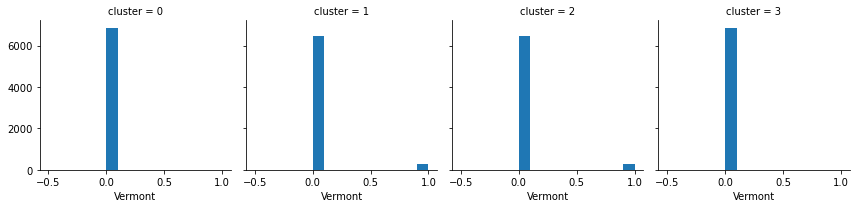

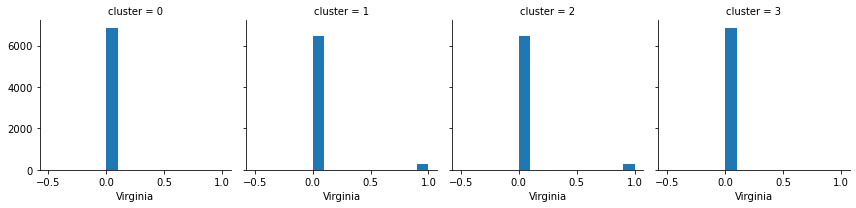

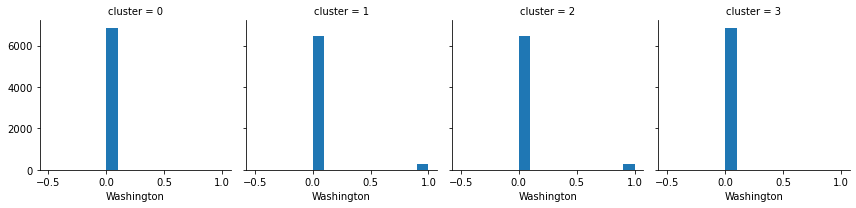

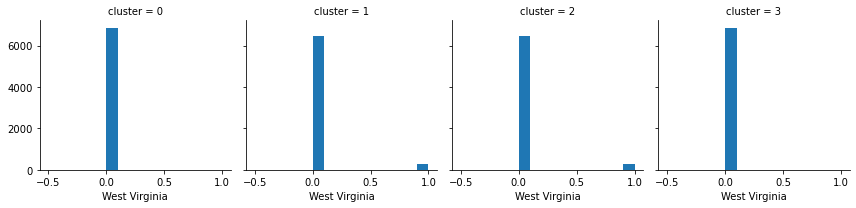

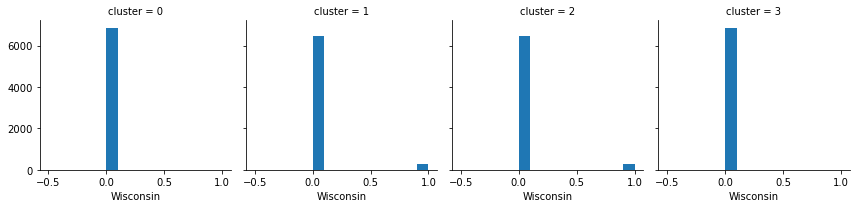

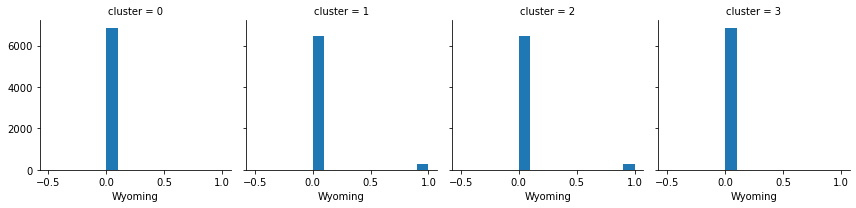

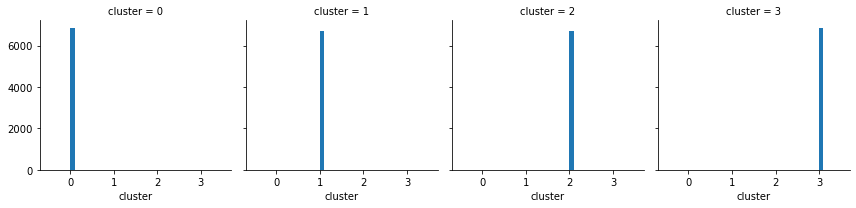

In [20]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

Result

Cluster 0

These are the people with maximum death rate.
People are most affected in winters (December to March).
Both males and females are equally imapcted by Covid in this group.
People from age group 70-84 belong to this group.
People from New York city and California fall in this category.
This is the group that requires vaccinations before other people.

Cluster 1

These are the people having intermediate death rates.

Cluster 2

These are the people with least death rate.

Cluster 3

These are the people having intermediate death rates.
​